## setup and notebook configuration

In [1]:
# scientific python stack
import numpy as np
import scipy as sp
import sympy as sym
import orthopy

In [2]:
# matplotlib, plotting setup
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.tri as mtri               # delaunay triangulation
from mpl_toolkits.mplot3d import Axes3D     # surface plotting
import seaborn as sns                       # nice plotting defaults
import cmocean as cmo                       # ocean colormaps
sym.init_printing(use_latex='mathjax')
sns.set()
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

/Users/corbin/virtual_envs/FEMexperiment_env/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
# local imports
import src.fem_base.master.mk_basis_nodal as mbn
import src.fem_base.master.mk_master as mkm

# creating nodal bases

## 1D basis

make a nodal basis on the master 1D element

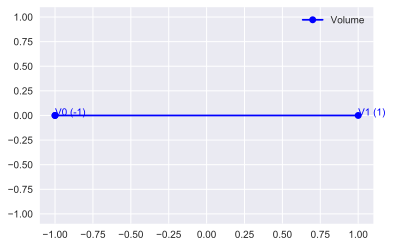

In [5]:
b = mbn.Basis_nodal(order=1, dim=1, element=0)
b.plot_elm()

each Basis_nodal object has an `eval_at_pts` method which can evaluate the basis at a given set of points. We can use this function to plot the basis functions over the element. Clunky, but this was originally written to accept input like `[[x1, y1, z1], [x2, y2, z2], ]`

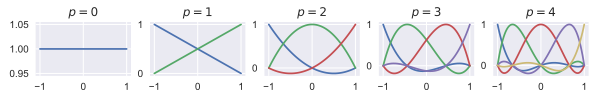

In [6]:
fig, ax = plt.subplots(1, 5, figsize = (10, 1))
xx = np.linspace(-1, 1, 100)
pts = [[x, 0, 0] for x in xx]

for order in range(5):
    b = mbn.Basis_nodal(order=order, dim=1, element=0)
    yy = b.eval_at_pts(pts=pts)
    for basis_fn in range(b.nb):
        ax[order].plot(xx, yy[:, basis_fn])
    ax[order].set_title(r'$p = {}$'.format(order))

## 2D

# creating master elements

## master triangle

In [7]:
m = mkm.Master_nodal(order=1, dim=2, element=0)
print(dir(m))

['K', 'L', 'M', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_mk_ed_orient', '_mkelmFEM', '_mkelmSHAP', 'basis', 'cube_pts', 'cube_pts2xy', 'cube_wghts', 'dim', 'ed_orient', 'element', 'n', 'n_cube_pts', 'n_ed_type', 'n_quad', 'nb', 'ne', 'nodal_pts', 'nodal_shap_der', 'nr', 'nv', 'shap', 'shap_der']


By default there is a nodal shift that happens to prevent the Vandermonde matrices from being ill-conditioned. This is described in Hesthaven Warburton.

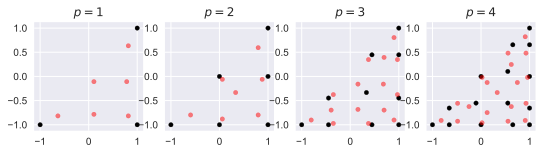

In [8]:
fig, ax = plt.subplots(1, 4, figsize=(9, 2))
for p in range(4):
    m = mkm.Master_nodal(order=p+1, dim=2, element=0)
    xp, yp = m.nodal_pts[:,0], m.nodal_pts[:,1]
    ax[p].scatter(xp, yp, s=20, c='k', label='nodal')
    ax[p].set_title(r'$p = {}$'.format(p+1))
    ax[p].axis('equal')
    xq, yq, wq = m.cube_pts[:,0], m.cube_pts[:,1], m.cube_wghts
    ax[p].scatter(xq, yq, s=20, c='r', alpha=0.5, label='quad')
    

## master quad

## nodal placements

In [9]:
m = mkm.Master_nodal(order=1, dim=1, element=0)
b = m.basis
# weirdly formatted MPU requirement for mk_vander
nodes = [np.append(float(pt), [0., 0.]) for pt in b.nodal_pts]
V = b.mk_vander(nodes)
print(V)
print(np.linalg.inv(np.dot(V, V.T)))
print(m.M)

[[ 1. -1.]
 [ 1.  1.]]
[[0.5 0. ]
 [0.  0.5]]
[[0.66666667 0.33333333]
 [0.33333333 0.66666667]]


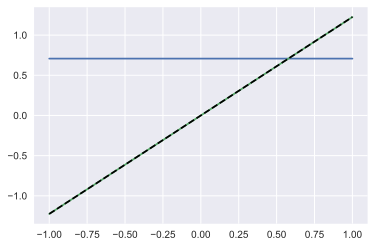

In [23]:
x = np.linspace(-1, 1, 10)
vals = orthopy.line_segment.tree_jacobi(x, n=4, alpha=0, beta=0, standardization='normal')
plt.plot(x, vals[0])
plt.plot(x, vals[1])
p2 = np.sqrt(3./2)*x
plt.plot(x, p2, 'k--')

In [21]:
1/np.sqrt(2)

0.7071067811865475